# **DSCI 100 Team 11 Project Report: Classifying students' knowledge level of Electrical DC Machines based on the relationship between PEG and LPR**

## Introduction

An ***Electrical Direct Current (DC) Machine*** can be classified as a DC motor or a DC generator, and it is responsible for altering electromechanical energy depending on the type of machine it is. For example, a DC motor will convert DC electrical power to mechanical power, while a DC generator will do the opposite. DC machines are used in trains, mills, and mines (Agarwal, 2020).

By method of K-nearest neighbours classification ***(KNN)***, using a dataset about students' knowledge on the subject of Electrical DC Machines, we will answer the question of ***how the knowledge level on Electrical DC Machines of a user is classified based on two predictors:*** ***PEG***, exam performance of the user for goal objects (knowledge on Electrical DC Machines), and ***LPR***, exam performance of the user for related objects (knowledge on subjects related to Electrical DC Machines) with the goal object (Kahraman et al., 2013).

This dataset is a csv file that has been ***split*** into a training and testing dataset by the author themselves. Using this split, we will ***assign*** it as our training data and testing data, respectively. There are 5 predictors: STG (degree of study time for goal object materials), SCG (degree of repetition number of user for goal object materials), STR (degree of study time of user for related objects with goal object), ***LPR***, and ***PEG***, and ***one response variable, UNS*** (knowledge level on Electrical DC Machines of the user), which includes ***4 different categories: “Very Low”, “Low”, “Middle”, and “High”*** (Kahraman et al., 2013).

## Methods and Results

Reading our dataset into R.

In [1]:
# Setting seed for the project
set.seed(2)

# Loading test and training sets into separate dataframes (they have already been separated by the dataset authors)

install.packages("themis")

library(tidyverse)
library(readxl)
library(repr)
library(tidymodels)
library(themis)

train_url <- 'https://raw.githubusercontent.com/miketham24/team-11-dsci-100-project/main/data/Data_User_Modeling_Dataset_Hamdi-Tolga-KAHRAMAN_training.csv'
train_path <- 'data/user_knowledge_train.csv'
download.file(train_url, train_path)
uk_train <- read_csv(train_path) |>
    select(-...7, -...8, -'Attribute Information:') # this will be our training data

test_url <- 'https://raw.githubusercontent.com/miketham24/team-11-dsci-100-project/main/data/Data_User_Modeling_Dataset_Hamdi-Tolga-KAHRAMAN_testing.csv'
test_path <- 'data/user_knowledge_test.csv'
download.file(test_url, test_path)
uk_test <- read_csv(test_path) |>
    select(-...7, -...8, -'Attribute Information:') # and this will be our testing data

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes     

In [2]:
head(uk_train)

STG  SCG  STR  LPR  PEG  UNS     
1 0.00 0.00 0.00 0.00 0.00 very_low
2 0.08 0.08 0.10 0.24 0.90 High    
3 0.06 0.06 0.05 0.25 0.33 Low     
4 0.10 0.10 0.15 0.65 0.30 Middle  
5 0.08 0.08 0.08 0.98 0.24 Low     
6 0.09 0.15 0.40 0.10 0.66 Middle

**Table 1.** First six observations of the training data.

In [3]:
head(uk_test)

STG  SCG  STR  LPR  PEG  UNS     
1 0.00 0.10 0.50 0.26 0.05 Very Low
2 0.05 0.05 0.55 0.60 0.14 Low     
3 0.08 0.18 0.63 0.60 0.85 High    
4 0.20 0.20 0.68 0.67 0.85 High    
5 0.22 0.22 0.90 0.30 0.90 High    
6 0.14 0.14 0.70 0.50 0.30 Low

**Table 2.** First six observations of the testing data.

Our data is already mostly tidied: each of the cell values occurs only once, each vector represents one variable, and each row one observation. All numerical vectors are `<dbl>`.

In [4]:
# There are still a few things we can do to tidy our data

uk_train_scaled <- uk_train |>
    mutate(UNS = as_factor(UNS)) |>   # Here we convert USN from <chr> to <fct>
    mutate(UNS = fct_recode(UNS, "Very Low" = "very_low")) |>   # Now we standardize UNS class names between testing and training sets
    mutate(STG = scale(STG),   # And finally scale our numerical data
           SCG = scale(SCG),
           STR = scale(STR),
           LPR = scale(LPR),
           PEG = scale(PEG))

uk_test_scaled <- uk_test |>
    mutate(UNS = as_factor(UNS)) |>   # We also want to convert UNS to <fct> with our testing data
    mutate(STG = scale(STG),   # As well as scale the test numerical data
           SCG = scale(SCG),
           STR = scale(STR),
           LPR = scale(LPR),
           PEG = scale(PEG))

In [5]:
head(uk_train_scaled)

STG       SCG        STR        LPR        PEG        UNS     
1 -1.765089 -1.6780077 -1.9029207 -1.7440515 -1.7967053 Very Low
2 -1.384627 -1.3005822 -1.4963171 -0.7767309  1.7297900 High    
3 -1.479743 -1.3949386 -1.6996189 -0.7364259 -0.5036570 Low     
4 -1.289512 -1.2062258 -1.2930153  0.8757751 -0.6212069 Middle  
5 -1.384627 -1.3005822 -1.5776378  2.2058409 -0.8563066 Low     
6 -1.337070 -0.9703348 -0.2765062 -1.3410013  0.7893912 Middle

**Table 3.** First six observations of tidied training data.

In [6]:
head(uk_test_scaled)

STG        SCG        STR       LPR        PEG        UNS     
1 -1.5142778 -1.1525157 0.2452099 -0.6155307 -1.4020025 Very Low
2 -1.2784849 -1.3772532 0.4470002  0.6235230 -1.0884978 Low     
3 -1.1370092 -0.7929358 0.7698645  0.6235230  1.3847057 High    
4 -0.5711065 -0.7030408 0.9716548  0.8786222  1.3847057 High    
5 -0.4767893 -0.6131458 1.8595318 -0.4697597  1.5588750 High    
6 -0.8540579 -0.9727257 1.0523709  0.2590954 -0.5311562 Low

**Table 4.** First six observations of tidied testing data.

Creating training data summary statistic tables.

In [7]:
# table_5 counts the number of observations in each UNS class
table_5 <- uk_train_scaled |>
    group_by(UNS) |>
    count() |>
    rename(count = n)

# table_6 gives us the minimum, maximum and mean of each numerical variable
table_6 <- uk_train_scaled |>
    summarize(across(where(is.numeric), .fns =
                     list(minimum = min,
                          maximum = max,
                          mean = mean))) |>
    pivot_longer(cols = everything(),
               names_sep = '_',
               names_to = c('.value', 'variable'))

In [8]:
table_5

UNS      count
1 Very Low 24   
2 High     63   
3 Low      83   
4 Middle   88

**Table 5.** Class counts for each class in the UNS vector.

In [9]:
table_6

variable STG           SCG           STR           LPR          
1 minimum  -1.765089e+00 -1.678008e+00 -1.902921e+00 -1.744052e+00
2 maximum   2.943117e+00  2.568030e+00  1.959814e+00  2.246146e+00
3 mean     -8.605035e-17  5.559184e-17  7.350975e-17  1.052412e-16
  PEG          
1 -1.796705e+00
2  1.847340e+00
3  6.393977e-17

**Table 6.** Summary statistics for each possible predictor.

Making some scatterplots to determine what variables are most viable as predictors for `UNS`.

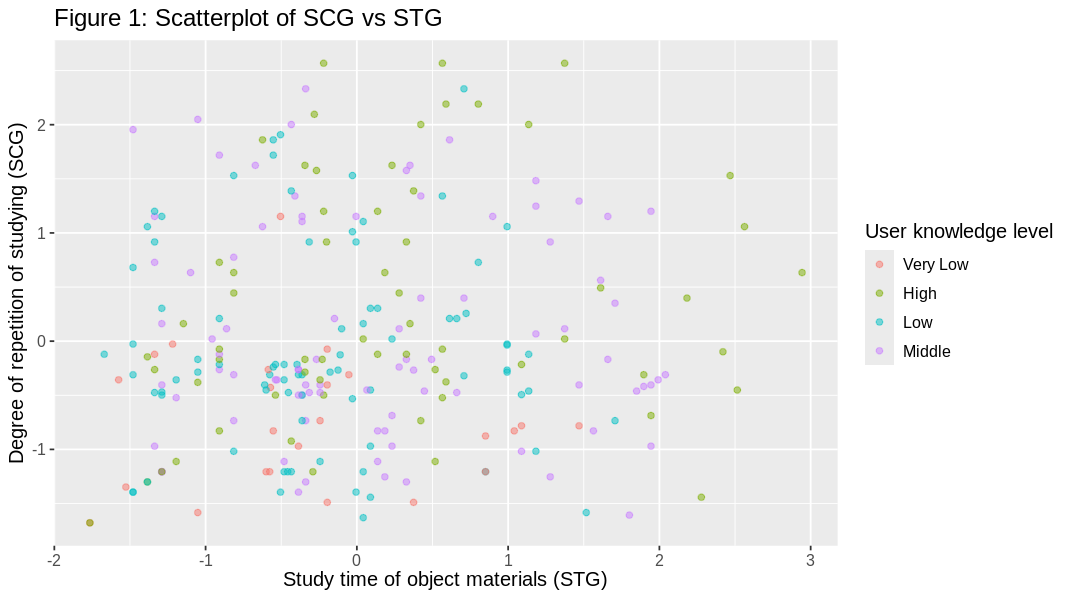

In [10]:
# Scatterplot visualizing relationships of SCG, STG and UNS in the scaled training data

options(repr.plot.height = 5, repr.plot.width = 9)
ggplot(uk_train_scaled,
       aes(x = STG,
           y = SCG,
           colour = UNS)) +
    geom_point(alpha = 0.5) +
    labs(x = 'Study time of object materials (STG)',
         y = 'Degree of repetition of studying (SCG)',
         colour = 'User knowledge level',
         title = 'Figure 1: Scatterplot of SCG vs STG') +
    theme(text = element_text(size = 12))

There are no obvious patterns of user knowledge level with either `SCG` or `STG`. Trying different variables:

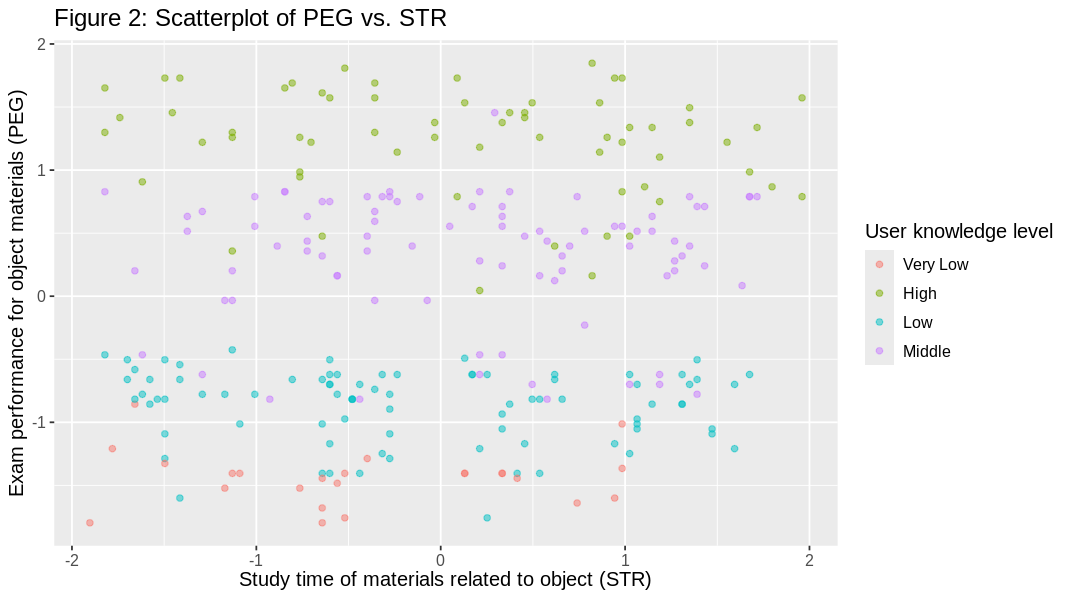

In [11]:
# scatterplot visualizing relationships of PEG, STR and UNS in the scaled training data

options(repr.plot.height = 5, repr.plot.width = 9)
ggplot(uk_train_scaled,
       aes(x = STR,
           y = PEG,
           colour = UNS)) +
    geom_point(alpha = 0.5) +
    labs(x = 'Study time of materials related to object (STR)',
         y = 'Exam performance for object materials (PEG)',
         colour = 'User knowledge level',
         title = 'Figure 2: Scatterplot of PEG vs. STR') +
    theme(text = element_text(size = 12))

Here we see a clear positive relationship between `UNS` and `PEG`. However, it doesn't seem to have any relation to `STR`, so it's best if we find a different second predictor.

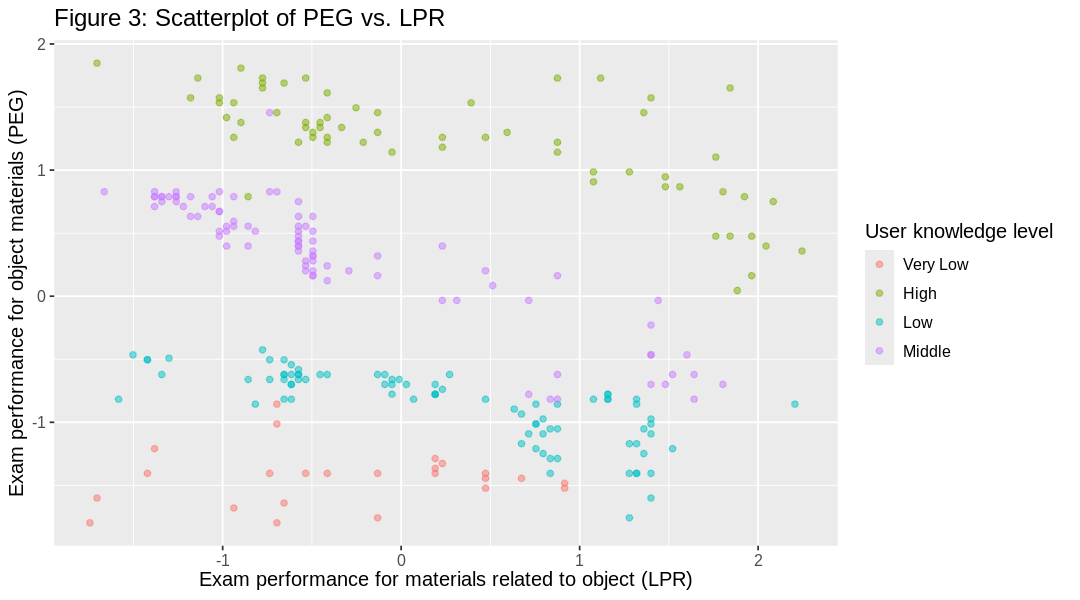

In [12]:
# scatterplot visualizing relationships of PEG, LPR and UNS in the scaled training data

options(repr.plot.height = 5, repr.plot.width = 9)
ggplot(uk_train_scaled,
       aes(x = LPR,
           y = PEG,
           colour = UNS)) +
    geom_point(alpha = 0.5) +
    labs(x = 'Exam performance for materials related to object (LPR)',
         y = 'Exam performance for object materials (PEG)',
         colour = 'User knowledge level',
         title = 'Figure 3: Scatterplot of PEG vs. LPR') +
    theme(text = element_text(size = 12))

This scatterplot demonstrates a stronger relationship between both axis variables and user knowledge level. So, we will be able to build a more accurate k-nearest neighbours model using PEG and LPR as predictors. We can now finish tidying our data by selecting only PEG, LPR and UNS in both datasets.

In [13]:
uk_train_scaled <- uk_train_scaled |>
    select(LPR, PEG, UNS)

uk_test_scaled <- uk_test_scaled |>
    select(LPR, PEG, UNS)

In [14]:
head(uk_train_scaled)

LPR        PEG        UNS     
1 -1.7440515 -1.7967053 Very Low
2 -0.7767309  1.7297900 High    
3 -0.7364259 -0.5036570 Low     
4  0.8757751 -0.6212069 Middle  
5  2.2058409 -0.8563066 Low     
6 -1.3410013  0.7893912 Middle

**Table 7.** A few observations of the training data after tidying and selecting predictors.

In [15]:
head(uk_test_scaled)

LPR        PEG        UNS     
1 -0.6155307 -1.4020025 Very Low
2  0.6235230 -1.0884978 Low     
3  0.6235230  1.3847057 High    
4  0.8786222  1.3847057 High    
5 -0.4697597  1.5588750 High    
6  0.2590954 -0.5311562 Low

**Table 8.** A few observations of the testing data after tidying and selecting predictors.

Now that our data has been preprocessed, we can start out on our K-NN classification alogrithm. Since the author of the dataset has already split the data into a testing and training set, there will be no need to use the 'inital_split' function here.

In [16]:
# Looking at Table 5, we can see that the proportions of the labels in the training data aren't
# very similar to each other. So, we will need to balance our training data to prevent the model.

# We are next creating a recipe that standardizes and balances our training data:

set.seed(2)

uk_recipe <- recipe(UNS ~ LPR + PEG, data = uk_train_scaled) |>
    step_upsample(UNS, over_ratio = 1, skip = FALSE) |> # Here we balance the training data
    step_impute_mean(all_predictors()) |>
    prep()

upsampled_uk_train <- bake(uk_recipe, uk_train_scaled)

table_9 <- upsampled_uk_train |>
    group_by(UNS) |>
    summarize(n = n())

table_9

uk_recipe_standardize <- recipe(UNS ~ LPR + PEG, data = upsampled_uk_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

# Since the over_ratio is 1, the count for each UNS should be the same as shown below. 
# We can see, looking below, that the count of each UNS label is 88.

UNS      n 
1 Very Low 88
2 High     88
3 Low      88
4 Middle   88

**Table 9.** UNS class count for balanced training data.

In [17]:
# Now we can make a K-NN model specification for tuning our model:

set.seed(2)

uk_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

In [18]:
# Next, we will perform a 5-fold cross-validation to determine 
# the optimal number of neighbors to use in our model.

# We will test k values from 1 to 15, and look at the accuracy of models using each k.

set.seed(2)

uk_vfold <- vfold_cv(upsampled_uk_train, v = 5, strata = UNS)

k_vals <- tibble(neighbors = seq(from = 1, to = 15, by = 1))

uk_fit_cross <- workflow() |>
    add_recipe(uk_recipe_standardize) |>
    add_model(uk_spec) |>
    tune_grid(resamples = uk_vfold, grid = k_vals) |>
    collect_metrics()

uk_accuracies <- uk_fit_cross |>
    filter(.metric == "accuracy")

head(uk_accuracies)

neighbors .metric  .estimator mean      n std_err    .config              
1 1         accuracy multiclass 0.9740196 5 0.01267367 Preprocessor1_Model01
2 2         accuracy multiclass 0.9740196 5 0.01267367 Preprocessor1_Model02
3 3         accuracy multiclass 0.9629085 5 0.01005798 Preprocessor1_Model03
4 4         accuracy multiclass 0.9629085 5 0.01005798 Preprocessor1_Model04
5 5         accuracy multiclass 0.9658497 5 0.01194712 Preprocessor1_Model05
6 6         accuracy multiclass 0.9658497 5 0.01194712 Preprocessor1_Model06

**Table 10.** Measures of accuracy for first six tested neighbors.

In [19]:
# Using the accuracies we obtained in the previous cell, 
# we can produce an accuracy vs. k plot and determine the best k.

set.seed(2)

uk_best_k <- uk_accuracies |>
    arrange(desc(mean)) |>
    head(1) |>
        pull(neighbors)
uk_best_k

[1] 1

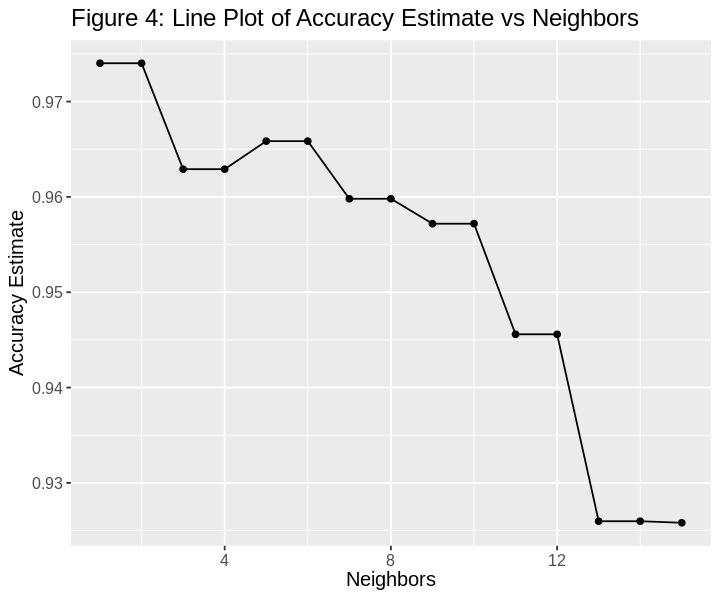

In [20]:
# The best k was determined to be 1, but since we want to avoid overfitting, let's create an accuracy vs. k plot to determine a different best k

options(repr.plot.height = 5, repr.plot.width = 6)
uk_accuracy_vs_k <- ggplot(uk_accuracies, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    ggtitle("Figure 4: Line Plot of Accuracy Estimate vs Neighbors") +
    theme(text = element_text(size = 12))

uk_accuracy_vs_k

Looking at the accuracy estimate vs. neighbors line plot above, our best k is 1 neighbors. However we should not use k = 1 as it will result in overfitting our data; the classification of a new observation will be based on a single nearest neighbour and potentially lead to our model performing well on the training data but not on new data like the testing set.

Neither should we use k = 2, as we should avoid choosing an even number as our k value. During our k-nn algorithm, when we want to classify a new observation on a majority vote of the neighbouring classes, the likelihood of having ties occur is higher with an even number, so choosing an even k will result in more predictions.

Therefore, we will look at the next peak in which our best k is 5 neighbors and use this as our k value.

In [21]:
# Let's build a model with our prevously-determined best k

set.seed(2)

# Making a new specification with k = 5:
uk_spec_best_k <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
    set_engine("kknn") |>
    set_mode("classification")

# Fitting our recipe and new spec to the training data:
uk_best_k_fit <- workflow() |>
    add_recipe(uk_recipe_standardize) |>
    add_model(uk_spec_best_k) |>
    fit(data = upsampled_uk_train)

In [22]:
# Now that we have our best k model, let's evaluate its performance.

# Predicting test data labels:
uk_test_predictions <- predict(uk_best_k_fit, uk_test_scaled) |>
    bind_cols(uk_test_scaled) |>
    mutate(.pred_class = fct_relevel(.pred_class, c("Very Low", "Low", "Middle", "High"))) |>   # Here we make sure that truth and estimate
    mutate(UNS = fct_relevel(UNS, c("Very Low", "Low", "Middle", "High")))                      # vectors have matching level orders so that 
                                                                                                # metrics() will work properly
# Determining prediction accuracy:
uk_knn_accuracy <- uk_test_predictions |>
    metrics(truth = UNS, estimate = .pred_class) |>
    filter(.metric == "accuracy") |>
    pull(.estimate)
uk_knn_accuracy

# Note that we have no positive UNS class, so we cannot calculate a precision or recall.

[1] 0.937931

In [23]:
# Looking at the cell output above, the accuracy of our model is ~94%. 
# Let's visualise this as a confusion matrix:

confusion <- uk_test_predictions |>
    conf_mat(truth = UNS, estimate = .pred_class)
confusion

          Truth
Prediction Very Low Low Middle High
  Very Low       24   1      0    0
  Low             2  39      0    0
  Middle          0   6     34    0
  High            0   0      0   39

**Table 11.** Confusion matrix for model with testing data.

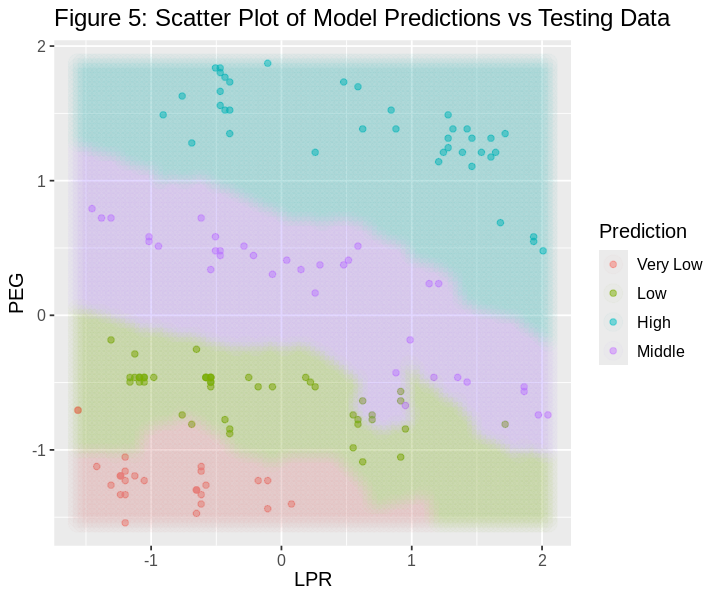

In [24]:
# We can also create a visualization that will show us where the model will predict each class. Let's try that:

# Creating a dataframe of LPR and PEG values
LPR_grid <- seq(min(uk_test_scaled$LPR),
                max(uk_test_scaled$LPR),
                length.out = 100)
PEG_grid <- seq(min(uk_test_scaled$PEG),
                max(uk_test_scaled$PEG),
                length.out = 100)
LPR_PEG_grid <- as_tibble(expand.grid(LPR = LPR_grid,
                                PEG = PEG_grid))

# Making predictions at the grid points and binding them as a column with grid points
knn_pred_grid <- predict(uk_best_k_fit, LPR_PEG_grid)

prediction_table <- bind_cols(knn_pred_grid, LPR_PEG_grid) |>
    rename(Class = .pred_class)

# Creating the plot
uk_viz_plot <- ggplot() +
    geom_point(data = uk_test_scaled, # This part plots the test data colored scatter
               mapping = aes(x = LPR,
                             y = PEG,
                             color = UNS),
               alpha = 0.5) +
    geom_point(data = prediction_table, # This part plots the colour of predicted classes
               mapping = aes(x = LPR,
                             y = PEG,
                             color = Class),
               alpha = 0.02,
               size = 5) +
    labs(color = "Prediction",
         x = "LPR",
         y = "PEG") +
    ggtitle("Figure 5: Scatter Plot of Model Predictions vs Testing Data") +
    theme(text = element_text(size = 12))

uk_viz_plot

# In the scatterplot below, the data points correspond to observations in the testing set,
# while the colored backgrounds indicate what prediction our model will make.

## Discussion

In this project, we created a K-NN classification model that uses the predictor variables, ***PEG***, the exam performance of the user for goal objects (knowledge of Electrical DC Machines), and ***LPR***, the exam performance of the user for related objects (knowledge of subjects related to Electrical DC Machines) with the goal object in the data set to predict our response variable, ***UNS***, the knowledge level on Electrical DC Machines of the user.

We used trial and error to test which variables out of all in the data set showed the strongest relationship with UNS. After creating scatterplots testing multiple variables like ***SCG*** (The degree of repetition number of user for goal object materials) and ***STG*** (​​The degree of study time for goal object materials) as predictors for ***UNS***, then ***PEG*** (Exam performance of the user on goal objects) and ***STR*** (The degree of study time of user for related objects with goal object), we finally concluded that the variables that showed the strongest relationship with ***UNS*** were ***PEG*** and ***LPR***. Thus, we decided to build a ***K-NN classification model that used PEG and LPR as predictor variables for UNS***. 

The PEG, LPR and UNS scatterplot showed that as the value of the predictor variables increases, the UNS does too. This was consistent with our prediction that PEG and LPR would have a strong, positive, linear correlation with UNS. Our K-NN classification model was built keeping this relationship in mind. 

We used accuracy as our evaluation metric for our K-NN model as it is easy to interpret and is well-suited for evaluating models trained on balanced datasets. To perform this evaluation, we conducted a 5-fold cross-validation and determined that the optimal value of k for our classification model is ***k = 5***. However, we had to evaluate different values of k before choosing k = 5 as our accuracy estimate vs neighbors line plot suggested that our best k value was 1. 

Through deliberation and discussion, we decided to not use k = 1. This is because our model will be overly sensitive to noise in the training data and will result in overfitting--consequently leading to our model not generalizing well with unseen test data and a poor performing model. The next best k was 2, which we decided not to use as well as it is an even number and would lead to ties in when classifying a new observation on a majority vote of the neighbouring classes. The likelihood of having ties occur is higher with an even number as only 2 neighbors are involved in the voting process, resulting in inconclusive insights from our analysis as our model may then struggle to make definitive predictions for new, unseen observations.

We then took a look at the next peak in our accuracy estimate vs neighbors line plot, where the next best k was 5. We believe this was the best choice as k = 5 strikes a balance between bias and variance in our model. It is large enough to prevent overfitting and also not too small that it introduces high bias. Additionally, it is an odd number so it avoids the likelihood of ties in our K-NN classification algorithm voting process. Using k = 5 to train our model on the entire training data set and the testing data set to evaluate our model’s performance, resulted in ***~94% accuracy***, which shows that our model has a high accuracy rate and is effective at classifying our response variable, ***UNS***.

Contrary to that, a 94% accuracy rate also suggets that there is room for improvement. The 6% difference, while a small number, may lead to huge implications on student's lives if changes in their education was made based on the errors. To have a greater understanding of our errors, we decided to use a confusion matrix to showcase the different type of errors our model produced. This is because, although the metric, accuracy, provides the frequency of errors from our model, it doesn't specify the patterns or nature of its errors (Timbers, Campbell, & Lee, 2023). 

Our model was able to predict "Very Low" and "High" UNS with no errors and "Low" and "Middle" UNS with minimal errors. 2 "Very Low" observations were predicted as "Low", 1 "Low" observation was predicted as "Very Low", and 6 "Low" predictions were predicted as "Middle". It managed to classify extreme values of the UNS without any error, but faltered when it came to relatively average values. Nevertheless, there wasn't a drastic difference (such as an observation being predicted 2 classes away e.g. "Very Low" observation predicted as "High") between the test data and predictions, showcasing the strength and accuracy of our model. 

However, something that we could have done differently when building our model was potentially combining our K-NN classification model with other machine learning models such as decision trees or random forests in order to leverage the strengths of each model and potentially improve our model performance (Mazinani, Sayyed Majid & Fathi, Kazem., 2015). Moreover, we were not able to utilize other metrics like precision or recall as we have no positive ***UNS*** class so we could have used other performance evaluation metrics such as Brier Scores (Houd, 2023) in addition to our confusion matrix to provide a more comprehensive data analysis and conclusion. 

Overall, from our model, we can gain insights into what to focus on when developing curricula related to Electrical DC machinery. Our model predicts with a 94% accuracy that doing well on exams on the topic itself as well as topics related to Electrical DC machinery can result in a high level of user knowledge of the same. This information can be put to use and educators can incorporate more and more exams into their programs to improve overall knowledge related to the topic. 

Two research questions this could lead to are – 
1. To what extent does the study time of related subject areas affect the exam performance of our target study area?
2. Do exam performance on goal objects and exam performance on related goal objects (our predictor variables) influence each other?

## References

Agarwal, T. (2020, October 31). What is a DC Machine : Construction & Its Working. ElProCus. https://www.elprocus.com/dc-machine-types-and-their-applications/ 

Houd, A. E. (2023, August 29). Brier Score: Understanding model calibration. neptune.ai. https://neptune.ai/blog/brier-score-and-model-calibration

Kahraman, H., Colak, I., & Sagiroglu, S. (2013). User Knowledge Modeling. UCI Machine Learning Repository. https://doi.org/10.24432/C5231X.

Mazinani, Sayyed Majid & Fathi, Kazem. (2015). Combining KNN and Decision Tree Algorithms to Improve Intrusion Detection System Performance. International Journal of Machine Learning and Computing. 5. 476-479. 10.18178/ijmlc.2015.5.6.556. 

Timbers, T., Campbell, T., & Lee, M. (2023, December 23). Data Science, A First Introduction. https://datasciencebook.ca/